In [1]:
import pyforest

In [2]:
train = pd.read_csv("dataset_adopt_pet/train.csv")
test = pd.read_csv("dataset_adopt_pet/test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
train

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
18829,ANSL_51738,2017-01-26 00:00:00,2018-03-09 15:35:00,2.0,Tricolor,0.44,27.36,0,1,0.0,2
18830,ANSL_59900,2016-06-18 00:00:00,2017-07-09 08:37:00,NaN,Brown,0.73,14.25,15,4,2.0,4
18831,ANSL_53210,2010-07-21 00:00:00,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9,1.0,1
18832,ANSL_63468,2017-05-12 00:00:00,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1.0,2


<IPython.core.display.Javascript object>

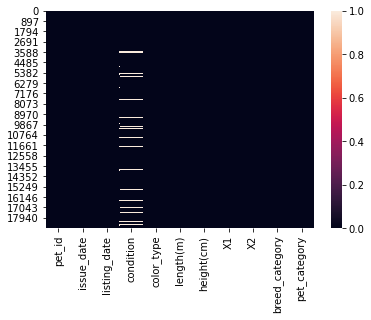

In [4]:
sns.heatmap(train.isnull())

In [5]:
train.isna().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [6]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


<IPython.core.display.Javascript object>

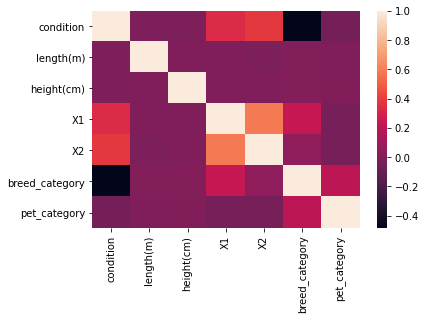

In [7]:
sns.heatmap(train.corr())

In [8]:
train.corr()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
condition,1.000000,-0.011219,-0.010793,0.338843,0.381696,-0.483503,-0.041660
length(m),-0.011219,1.000000,-0.004464,-0.002893,-0.011175,0.007229,-0.003999
height(cm),-0.010793,-0.004464,1.000000,-0.003801,-0.008216,0.011647,0.001976
X1,0.338843,-0.002893,-0.003801,1.000000,0.584396,0.240729,-0.032594
X2,0.381696,-0.011175,-0.008216,0.584396,1.000000,0.052530,-0.032116
breed_category,-0.483503,0.007229,0.011647,0.240729,0.052530,1.000000,0.209230
pet_category,-0.041660,-0.003999,0.001976,-0.032594,-0.032116,0.209230,1.000000


In [9]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

In [10]:
# preprocess = make_column_transformer(
#     (['condition'],SimpleImputer(strategy='mean')),
#     (['color_type'],OneHotEncoder()),remainder = 'passthrough')

In [11]:
rfc = ExtraTreesClassifier(n_estimators=100,random_state=0)
classifier = MultiOutputClassifier(rfc,n_jobs=-1)

In [12]:
# pipe = make_pipeline(preprocess,classifier)

In [13]:
# x = train.drop(['breed_category','pet_category','issue_date','listing_date','pet_id'], axis= 'columns')
# y = train[['breed_category','pet_category']]

In [14]:
# cross_val_score(pipe,x,y,cv=10)

In [15]:
train.fillna(method = 'ffill',inplace=True)

In [16]:
train.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64

In [17]:
x = train.drop(['breed_category','pet_category','issue_date','listing_date','pet_id'], axis= 'columns')
y = train[['breed_category','pet_category']]
x

,condition,color_type,length(m),height(cm),X1,X2
0,2.0,Brown Tabby,0.80,7.78,13,9
1,1.0,White,0.72,14.19,13,9
2,1.0,Brown,0.15,40.90,15,4
3,1.0,White,0.62,17.82,0,1
4,2.0,Black,0.50,11.06,18,4
...,...,...,...,...,...,...
18829,2.0,Tricolor,0.44,27.36,0,1
18830,2.0,Brown,0.73,14.25,15,4
18831,0.0,Calico Point,0.99,28.13,13,9
18832,0.0,Tan,0.55,44.82,13,9


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x.color_type = le.fit_transform(x.color_type)
x

,condition,color_type,length(m),height(cm),X1,X2
0,2.0,18,0.80,7.78,13,9
1,1.0,53,0.72,14.19,13,9
2,1.0,15,0.15,40.90,15,4
3,1.0,53,0.62,17.82,0,1
4,2.0,2,0.50,11.06,18,4
...,...,...,...,...,...,...
18829,2.0,52,0.44,27.36,0,1
18830,2.0,15,0.73,14.25,15,4
18831,0.0,22,0.99,28.13,13,9
18832,0.0,48,0.55,44.82,13,9


In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('color_type', OneHotEncoder(), [0])], remainder = 'passthrough')

In [20]:
x.isnull().sum()

condition     0
color_type    0
length(m)     0
height(cm)    0
X1            0
X2            0
dtype: int64

In [21]:
x = ct.fit_transform(x)
x.shape

(18834, 8)

In [22]:
cross_val_score(classifier,x,y,cv=10).mean()

0.7018147341336552

In [45]:
from sklearn.model_selection import cross_val_predict
cross_pred = cross_val_predict(classifier,x,y,cv=10)
cross_pred

array([[1., 1.],
       [0., 2.],
       [2., 4.],
       ...,
       [1., 1.],
       [1., 2.],
       [1., 2.]])

In [23]:
classifier.fit(x,y)

MultiOutputClassifier(estimator=ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                           

In [24]:
classifier.score(x,y)

0.9998407136030583

In [25]:
test.drop(['pet_id','issue_date','listing_date'],axis='columns',inplace=True)

In [26]:
test.fillna(method = 'ffill',inplace=True)

In [27]:
test.color_type = le.fit_transform(test.color_type)
test

,condition,color_type,length(m),height(cm),X1,X2
0,0.0,2,0.87,42.73,0,7
1,1.0,36,0.06,6.71,0,1
2,1.0,2,0.24,41.21,0,7
3,1.0,2,0.29,8.46,7,1
4,1.0,14,0.71,30.92,0,7
...,...,...,...,...,...,...
8067,2.0,14,0.82,36.08,13,9
8068,0.0,46,0.49,27.54,13,9
8069,0.0,2,0.98,37.19,0,7
8070,0.0,2,0.79,23.83,0,2


In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('color_type', OneHotEncoder(), [0])], remainder = 'passthrough')
test = ct.fit_transform(test)
test.shape

(8072, 8)

In [29]:
pred = classifier.predict(test)

In [36]:
rfc.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [38]:
pred_rfc = rfc.predict(test)

In [39]:
final = pd.read_csv("dataset_adopt_pet/test.csv")
final

<IPython.core.display.Javascript object>

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7
...,...,...,...,...,...,...,...,...,...
8067,ANSL_66809,2016-02-10 00:00:00,2017-03-10 14:56:00,2.0,Brown,0.82,36.08,13,9
8068,ANSL_59041,2015-12-07 00:00:00,2018-02-12 00:00:00,0.0,Tan,0.49,27.54,13,9
8069,ANSL_60034,2015-12-08 00:00:00,2017-01-04 17:19:00,0.0,Black,0.98,37.19,0,7
8070,ANSL_58066,2016-06-28 00:00:00,2017-07-20 18:19:00,NaN,Black,0.79,23.83,0,2


In [40]:
pred_rfc

array([[1., 2.],
       [0., 1.],
       [0., 2.],
       ...,
       [1., 2.],
       [2., 1.],
       [1., 2.]])

In [32]:
pred[:,0]

array([1., 0., 0., ..., 1., 2., 1.])

In [46]:
data = {'breed_category':cross_pred[:,0],'pet_category':cross_pred[:,1]}

In [47]:
df = pd.DataFrame(data=data,index=final.pet_id)

<IPython.core.display.Javascript object>

ValueError: Shape of passed values is (18834, 2), indices imply (8072, 2)

In [43]:
df

,breed_category,pet_category
pet_id,,
ANSL_75005,1.0,2.0
ANSL_76663,0.0,1.0
ANSL_58259,0.0,2.0
ANSL_67171,0.0,2.0
ANSL_72871,0.0,2.0
...,...,...
ANSL_66809,1.0,2.0
ANSL_59041,1.0,2.0
ANSL_60034,1.0,2.0


In [44]:
df.to_csv('final_submission_rfc.csv')